Q2


                        fun: 140735.64855994465
 lowest_optimization_result:       fun: 140735.64855994465
 hess_inv: array([[-574.37341434, -270.90070061, -748.53605055],
       [-270.90070061, -126.54691128, -352.4306235 ],
       [-748.53605055, -352.4306235 , -972.81173753]])
      jac: array([-2.8125    , -1.63476562, -2.70117188])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 460
      nit: 1
     njev: 112
   status: 2
  success: False
        x: array([2601.32769628, 1977.62175314, 4175.72331985])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 630
                       nfev: 327592
                        nit: 1000
                       njev: 80008
                          x: array([2601.32769628, 1977.62175314, 4175.72331985])


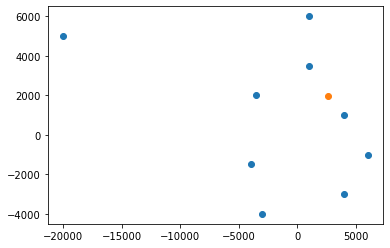

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import basinhopping
global t
global x
global y
t=np.array([79445,20009,21622,13683,24709,28223,11293,22990,16446],dtype = object)
x=np.array([-20000,1000,-3000,4000,-3500,1000,4000,-4000,6000],dtype = object)
y=np.array([5000,3500,-4000,1000,2000,6000,-3000,-1500,-1000],dtype = object)
plt.scatter(x, y)

#nonlinear method
def fun():
    fun = lambda pos: 0.3*(t[0] - pos[2]) - np.sqrt((x[0]-pos[0])*(x[0]-pos[0]) + (y[0]-pos[1])*(y[0]-pos[1]))+0.3*(t[1] - pos[2]) - np.sqrt((x[1]-pos[0])*(x[1]-pos[0]) + (y[1]-pos[1])*(y[1]-pos[1]))+0.3*(t[2] - pos[2]) - np.sqrt((x[2]-pos[0])*(x[2]-pos[0]) + (y[2]-pos[1])*(y[2]-pos[1]))+            0.3*(t[3] - pos[2]) - np.sqrt((x[3]-pos[0])*(x[3]-pos[0]) + (y[3]-pos[1])*(y[3]-pos[1]))+0.3*(t[4] - pos[2]) - np.sqrt((x[4]-pos[0])*(x[4]-pos[0]) + (y[4]-pos[1])*(y[4]-pos[1]))+0.3*(t[5] - pos[2]) - np.sqrt((x[5]-pos[0])*(x[5]-pos[0]) + (y[5]-pos[1])*(y[5]-pos[1]))+0.3*(t[6] - pos[2]) - np.sqrt((x[6]-pos[0])*(x[6]-pos[0]) + (y[6]-pos[1])*(y[6]-pos[1]))+0.3*(t[7] - pos[2]) - np.sqrt((x[7]-pos[0])*(x[7]-pos[0]) + (y[7]-pos[1])*(y[7]-pos[1]))+0.3*(t[8] - pos[2]) - np.sqrt((x[8]-pos[0])*(x[8]-pos[0]) + (y[8]-pos[1])*(y[8]-pos[1]))
    return fun

def func(s):
    func = 0
    for i in range(0,9):
        func = func + 0.3*(t[0] - s[2]) - np.sqrt((x[i]-s[0])*(x[i]-s[0]) + (y[i]-s[1])*(y[i]-s[1]))
    return func

class MyBounds:
    def __init__(self, xmax=[3000,3000,5000], xmin=[-3000,-3000,-5000] ):
        self.xmax = np.array(xmax)
        self.xmin = np.array(xmin)
    def __call__(self, **kwargs):
        x = kwargs["x_new"]
        tmax = bool(np.all(x <= self.xmax))
        tmin = bool(np.all(x >= self.xmin))
        return tmax and tmin


def con(): 
    # x1min, x1max, x2min, x2max,x3min,x3max = args
    cons = ({'type': 'ineq', 'fun': lambda pos: pos[0] + 3000},\
              {'type': 'ineq', 'fun': lambda pos: -pos[0] + 3000},\
             {'type': 'ineq', 'fun': lambda pos: pos[1] + 3000},\
                {'type': 'ineq', 'fun': lambda pos: -pos[1] + 3000},\
            {'type': 'ineq', 'fun': lambda pos: pos[2] + 5000},\
             {'type': 'ineq', 'fun': lambda pos: -pos[2] + 5000})
    return cons

# cons = con()
x0 = np.array((1500,1500,2500))
# minLocation = minimize(fun(), x0, method='SLSQP', constraints=cons)
# minLocation = minimize(fun(), x0, method='trust-constr', constraints=cons)
mybounds = MyBounds()
# globalLocation = basinhopping(func,x0,niter=10000, minimizer_kwargs={"method":"L-BFGS-B"}, accept_test=mybounds)
globalLocation = basinhopping(func,x0,niter=1000, minimizer_kwargs={"method":"BFGS"}, accept_test=mybounds)
# print(minLocation)
print()
print(globalLocation)

posx=np.array([2601.01])
posy=np.array([1976.92])

plt.scatter(posx, posy)




        

[[-1.20253315e+08]
 [-5.70642773e+06]
 [-1.72257756e+07]
 [ 3.88479173e+07]
 [-4.00972568e+06]
 [-4.82105292e+07]
 [ 4.28407426e+07]
 [-4.19762266e+07]]
[[-1.20279530e+08]
 [-5.74447868e+06]
 [-1.71693382e+07]
 [ 3.89018319e+07]
 [-4.06178937e+06]
 [-4.81728784e+07]
 [ 4.27669842e+07]
 [-4.19823395e+07]]

[[ 1999.51209958]
 [-1506.86794166]
 [ 2970.4610061 ]]


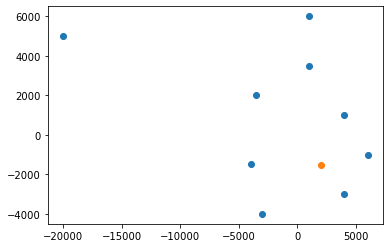

In [3]:
#Linear method
H = np.zeros((8,3))
for i in range(0,8):
    H[i][0] = 2*(x[i]-x[i+1])
for i in range(0,8):
    H[i][1] = 2*(y[i]-y[i+1])
for i in range(0,8):
    H[i][2] = -2*0.3*0.3*(t[i]-t[i+1])
# print(H)
Y = np.zeros((8,1))
for i in range(0,8):
    Y[i] = (x[i]**2-x[i+1]**2)+(y[i]**2-y[i+1]**2)-0.3*0.3*(t[i]**2-t[i+1]**2)
HT=H.T
print(Y)
# print(H.T)
theta=((np.linalg.inv(HT.dot(H))).dot(HT)).dot(Y)
alpha=H.dot(theta)
inv1 = np.linalg.inv(HT.dot(H))
theta = (inv1.dot(HT)).dot(Y)
print(alpha)
print()
print(theta)

posx=np.array([1999.512])
posy=np.array([-1506.86])
plt.scatter(x, y)
plt.scatter(posx, posy)
